In [30]:
%%capture capt
%run 7_SVD.ipynb

In [56]:
def getHybrdRecommendations(userId):
    if(len(ratedMovies) == 0):
            return getPopularMovies()
    contentRecommended = getContentRecomMovies(userId, contentSimilarity)
    #sns.histplot(contentRecommended['score'])
    svdRatings = []
    indexMap = pd.Series(contentRecommended.index, index=contentRecommended['movieId'])
    for movie in contentRecommended['movieId']:
        prediction = svd.predict(randomUser, movie)
        svdRatings.append((prediction.est + contentRecommended.iloc[indexMap[movie]].score)*(5/6))
    hybridRecommended = contentRecommended
    hybridRecommended['score'] = svdRatings
    sns.histplot(hybridRecommended['score'])
    hybridRecommended = hybridRecommended.sort_values(['score'],ascending=False)
    return hybridRecommended[:11]

In [58]:
randomUser = random.choice(movieRatings['userId'])
ratedMovies = movieRatings[movieRatings['userId']==randomUser]
avgRating = np.mean(ratedMovies['rating'])
topRatedMovies = ratedMovies
topRatedMovies = topRatedMovies.sort_values(['rating'],ascending=False)
print("userId : ", randomUser)
print("Total movies rated : ",len(ratedMovies))
print("Avg ratings :" , avgRating)
print("Top rated movies: ")
topRatedMovies['title'][:20]

userId :  654
Total movies rated :  479
Avg ratings : 4.065762004175365
Top rated movies: 


8323                                      Finding Nemo
52799                       E.T. the Extra-Terrestrial
40995               Close Encounters of the Third Kind
32326                                        Toy Story
41643                              Edward Scissorhands
7069                        Terminator 2: Judgment Day
51100                                     Time Bandits
681                                            Titanic
60252                                      Whale Rider
60053                                     Donnie Darko
39446                          The Empire Strikes Back
44989                                           Aliens
8495     The Lord of the Rings: The Return of the King
8681             The Lord of the Rings: The Two Towers
16987                                       Fight Club
8917                                   The Incredibles
9246                                       Toy Story 2
61545                                A Christmas Story
58937     

,movieId,score,titles
36,5952,4.614183,Revolutionary Road
37,7153,4.614145,Flushed Away
26,260,4.544506,Batman
53,4993,4.530983,Spider-Man 3
10,58559,4.475506,The Hobbit: An Unexpected Journey
11,48780,4.444214,Reservoir Dogs
116,527,4.371284,The Horseman on the Roof
6,69844,4.368007,John Carter
12,8636,4.360729,Mission: Impossible - Rogue Nation
34,48516,4.338365,Little Children


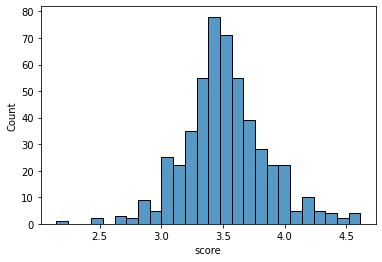

In [59]:
getHybrdRecommendations(randomUser)

,movieId,score,titles
18,3793,0.994320,The Day the Earth Stood Still
36,5952,0.912415,Revolutionary Road
37,7153,0.912415,Flushed Away
53,4993,0.813651,Spider-Man 3
118,6934,0.802803,Spider-Man
...,...,...,...
427,39234,0.099503,Time Bandits
471,6888,0.099357,The Fisher King
201,47384,0.099085,The Imaginarium of Doctor Parnassus
472,50802,0.089655,Mr. & Mrs. Smith


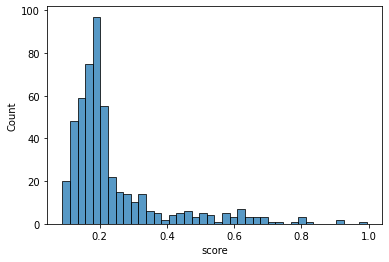

In [60]:
RecomContent = getContentRecomMovies(randomUser,contentSimilarity)
sns.histplot(RecomContent['score'])
RecomContent